## Expand Gene identities

In [1]:
# %reset
import pandas as pd
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/2.Pieris_napi"

gene_table = pd.read_csv(f"{location}/2.Annotation_busco_prediction/full_table.tsv", sep= "\t")
gene_table

,Busco_id,Status,Sequence,Gene_Start,Gene_End,Strand,Score,Length,OrthoDB url,Description
0,0at7088,Complete,NC_062252.1,641147.0,538914.0,-,16924.2,7966.0,https://v10-1.orthodb.org/?query=0at7088,Immunoglobulin
1,1at7088,Complete,NC_062259.1,9931230.0,10025586.0,+,9353.3,4245.0,https://v10-1.orthodb.org/?query=1at7088,Immunoglobulin
2,2at7088,Complete,NC_062243.1,10038037.0,10120567.0,+,25094.3,14024.0,https://v10-1.orthodb.org/?query=2at7088,EGF-like calcium-binding domain
3,3at7088,Complete,NC_062240.1,1488576.0,1636340.0,+,10339.2,5352.0,https://v10-1.orthodb.org/?query=3at7088,Spectrin repeat
4,4at7088,Complete,NC_062253.1,1072096.0,1192687.0,+,13332.1,6903.0,https://v10-1.orthodb.org/?query=4at7088,Spectrin repeat
...,...,...,...,...,...,...,...,...,...,...
5315,16855at7088,Complete,NC_062247.1,12577763.0,12578276.0,+,146.4,97.0,https://v10-1.orthodb.org/?query=16855at7088,"AT hook, DNA-binding motif"
5316,16938at7088,Complete,NC_062256.1,333560.0,336762.0,+,120.2,117.0,https://v10-1.orthodb.org/?query=16938at7088,uncharacterized protein LOC111359467
5317,16982at7088,Complete,NC_062248.1,803081.0,801475.0,-,139.8,124.0,https://v10-1.orthodb.org/?query=16982at7088,uncharacterized protein LOC110991765
5318,cycle,Complete,NC_062259.1,2828816.0,2853025.0,-,139.8,124.0,https://v10-1.orthodb.org/?query=16982at7088,cycle


In [2]:
output = "Busco_id\tChromosome\tGene_Start\tGene_End"
for row_details in gene_table.itertuples():
    if not(pd.isna(row_details.Sequence)):
        if row_details.Gene_Start > row_details.Gene_End:
            gene_start = row_details.Gene_End
            gene_end = row_details.Gene_Start
        else:
            gene_start = row_details.Gene_Start
            gene_end = row_details.Gene_End
        try:
            output += f"\n{row_details.Busco_id}\t{row_details.Sequence}\t{int(max(0,gene_start-10000))}\t{int(gene_end+10000)}"
        except:
            print(row_details.Busco_id, gene_end+10000)
            assert False
    # print(row_details)
    # break
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'w') as out_file:
    out_file.write(output)

In [3]:
fst_dictionary = {}
with open(f"{location}/1.FST_peaks_from_chris/two_pool_5%_0.05_5kb_merged.fst",'r') as fst_file:
# with open(f"{location}/1.FST_peaks_from_chris/two_pool_1%_0.098_5kb_merged.fst",'r') as fst_file:
    
    for fst_lines in fst_file.readlines()[1:]:
        line_split = fst_lines.strip().split(",")
        fst_dictionary.setdefault(line_split[0],[])
        
        fst_dictionary[line_split[0]].append([int(line_split[1]), int(line_split[2])])
        
print(fst_dictionary)


{'NC_062234.1': [[12001, 13000], [126001, 128000], [282001, 283000], [334001, 335000], [349001, 350000], [433001, 438000], [518001, 519000], [531001, 539000], [552001, 553000], [575001, 586000], [604001, 605000], [632001, 633000], [645001, 649000], [656001, 662000], [698001, 699000], [714001, 715000], [738001, 739000], [744001, 745000], [753001, 764000], [778001, 779000], [789001, 790000], [800001, 804000], [818001, 820000], [828001, 831000], [847001, 851000], [856001, 860000], [866001, 867000], [908001, 909000], [949001, 950000], [984001, 993000], [1002001, 1003000], [1127001, 1128000], [1175001, 1181000], [1191001, 1196000], [1264001, 1270000], [1282001, 1283000], [1341001, 1342000], [1453001, 1454000], [1480001, 1483000], [1495001, 1496000], [1511001, 1512000], [1518001, 1519000], [1566001, 1567000], [1914001, 1919000], [1964001, 1969000], [1977001, 1978000], [1987001, 1992000], [2001001, 2004000], [2080001, 2081000], [2171001, 2172000], [2217001, 2218000], [2256001, 2257000], [2292

In [4]:
gene_loc_dic = {}
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'r') as gene_loc_file:
    for gene_line in gene_loc_file.readlines()[1:]:
        line_split = gene_line.strip().split("\t")
        gene_loc_dic[line_split[0]] = [line_split[1],line_split[2],line_split[3]]
print(gene_loc_dic)
        

{'0at7088': ['NC_062252.1', '528914', '651147'], '1at7088': ['NC_062259.1', '9921230', '10035586'], '2at7088': ['NC_062243.1', '10028037', '10130567'], '3at7088': ['NC_062240.1', '1478576', '1646340'], '4at7088': ['NC_062253.1', '1062096', '1202687'], '6at7088': ['NC_062253.1', '6898579', '7019896'], '11at7088': ['NC_062235.1', '81790', '140675'], '13at7088': ['NC_062253.1', '7433661', '7510157'], '18at7088': ['NC_062234.1', '14729525', '14769680'], '20at7088': ['NC_062243.1', '5304276', '5346187'], '25at7088': ['NC_062235.1', '3539753', '3571872'], '26at7088': ['NC_062247.1', '3341506', '3431179'], '27at7088': ['NC_062259.1', '13333622', '13413334'], '28at7088': ['NC_062248.1', '4575826', '4663996'], '31at7088': ['NC_062249.1', '6716720', '6775291'], '33at7088': ['NC_062240.1', '9618625', '9679869'], '34at7088': ['NC_062247.1', '916817', '982024'], '36at7088': ['NC_062241.1', '7634651', '7673136'], '37at7088': ['NC_062259.1', '8647456', '8721497'], '38at7088': ['NC_062249.1', '4390970

In [5]:
# output_rho_set_location = "Gene,Chromosome,Location"
# with open(f"{location}/3.Rho_set_genes/Rho_set_gene2.txt", 'r') as rho_set_file:
#     for lines in rho_set_file.readlines():
#         rho_gene_name = lines.strip().split("\t")[0]
#         # print(lines.strip(),gene_loc_dic[lines.strip()])
#         # print(rho_gene_name)
#         chromosome,start,end = gene_loc_dic[rho_gene_name]
#         # print(chromosome,start,end)
#         output_rho_set_location +=  f"\n{rho_gene_name},{chromosome},{start}"

# # print(output_rho_set_location)
# with open(f"{location}/3.Rho_set_genes/Rho_set_location.csv", 'w') as rho_out_file:
#     rho_out_file.write(output_rho_set_location)

In [6]:
intersecting_genes = []
with open(f"{location}/3.Rho_set_genes/Rho_set_cluster.txt", 'r') as rho_set_file:
    for rho_set_count,lines in enumerate(rho_set_file.readlines()):
        rho_gene_name = lines.strip().split("\t")[0]
        # print(lines.strip(),gene_loc_dic[lines.strip()])
        try:
            chromosome,start,end = gene_loc_dic[rho_gene_name]
        except:
            print(rho_gene_name, "misiing")
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    print(lines, end = "")
                    intersecting_genes.append(rho_gene_name)
                    break
                # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
            # break
        except:
            print("missing",chromosome)
    

print("\n",len(intersecting_genes),len(set(intersecting_genes)),rho_set_count )
intersecting_genes = list(set(intersecting_genes))
final_gene_number = len(intersecting_genes)

10801at7088
10549at7088
3016at7088
4406at7088
1003at7088
5821at7088
14245at7088
7853at7088
3683at7088
1846at7088
15100at7088
1910at7088
4021at7088
4480at7088
190at7088
2905at7088
10192at7088
4998at7088
4163at7088
1947at7088
2599at7088
6826at7088
3363at7088
496at7088
821at7088
4689at7088
5767at7088
5722at7088
721at7088
717at7088
9682at7088
3811at7088
13075at7088
13445at7088
9564at7088
13346at7088
6937at7088
9240at7088
10447at7088
14598at7088
5480at7088
1709at7088
8007at7088
6156at7088
3667at7088
9535at7088
12391at7088
13774at7088
4595at7088
2372at7088
14391at7088
3226at7088
7622at7088
10666at7088
14949at7088
11592at7088
14339at7088
13737at7088
8222at7088
2031at7088
1637at7088
12180at7088
5852at7088
4279at7088
4935at7088
10101at7088
10268at7088
3161at7088 misiing
3161at7088
10728at7088
10571at7088
12326at7088
2201at7088
2902at7088
11288at7088
1837at7088
5679at7088
8306at7088
2939at7088
5486at7088
4119at7088
12212at7088
3162at7088
1144at7088
1628at7088
15271at7088
2813at7088
11619at7088
7

In [7]:
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

instersecting_genes_output = ""
for intersecting_gene_name in intersecting_genes:
    if intersecting_gene_name in gene_anno_dic:
        instersecting_genes_output += intersecting_gene_name+","+gene_anno_dic[intersecting_gene_name] + "\n"
    else:
        instersecting_genes_output += intersecting_gene_name+","+intersecting_gene_name + "\n"
# print(intersecting_genes)
with open(f"{location}/4.Intersections_test/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [8]:
instersecting_genes_output = "geneid\n"+"\n".join(set(intersecting_genes))
with open(f"{location}/4.Intersections_test/1.For GSEA/1.Rho Set/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [9]:
busco_gene_list = []
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/0.Gene_id_list/Busco_gene_id.txt",'r') as busco_gene_list_file:
    for lines in busco_gene_list_file:
        busco_gene_list.append(lines.strip())
print(len(busco_gene_list))

4564


In [10]:
rho_set_size = rho_set_count
import random
intersecting_genes_length_list = []
for i in range(1000):
    print("run ",i)
    test_gene_list = random.sample(busco_gene_list, rho_set_size)
    # print(len(test_gene_list), test_gene_list)
    intersecting_genes = []
    for gene_name in test_gene_list:
        try:
            chromosome,start,end = gene_loc_dic[gene_name]
        except:
            print(gene_name, "missing")
            pass
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    # print(gene_name,chromosome,start,end)
                    intersecting_genes.append(gene_name)
                    break
                    # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
                # break
        except:
            pass
    intersecting_genes_length_list.append(len(intersecting_genes))
print(len(intersecting_genes_length_list))

run  0
6951at7088 missing
5397at7088 missing
8967at7088 missing
11066at7088 missing
run  1
9345at7088 missing
4967at7088 missing
4198at7088 missing
10387at7088 missing
7400at7088 missing
run  2
8166at7088 missing
run  3
7181at7088 missing
5397at7088 missing
3161at7088 missing
run  4
9556at7088 missing
12884at7088 missing
10546at7088 missing
11558at7088 missing
run  5
8967at7088 missing
10387at7088 missing
run  6
10546at7088 missing
12884at7088 missing
1504at7088 missing
12632at7088 missing
177at7088 missing
5397at7088 missing
run  7
9108at7088 missing
4198at7088 missing
14240at7088 missing
7400at7088 missing
5051at7088 missing
4967at7088 missing
run  8
14240at7088 missing
6503at7088 missing
3161at7088 missing
run  9
5051at7088 missing
12884at7088 missing
11558at7088 missing
9556at7088 missing
4967at7088 missing
8967at7088 missing
run  10
5051at7088 missing
run  11
10387at7088 missing
11558at7088 missing
9345at7088 missing
run  12
10546at7088 missing
9108at7088 missing
14240at7088 missi

In [11]:
# import numpy as np
# # print((intersecting_genes_length_list))
# str_list = ""
# for num in intersecting_genes_length_list:
#     str_list += f"{num}\n"
# with open(f"{location}/4.Intersections_test/10000_runs_10kb.txt", 'w') as out_file:
#     out_file.write(str_list)

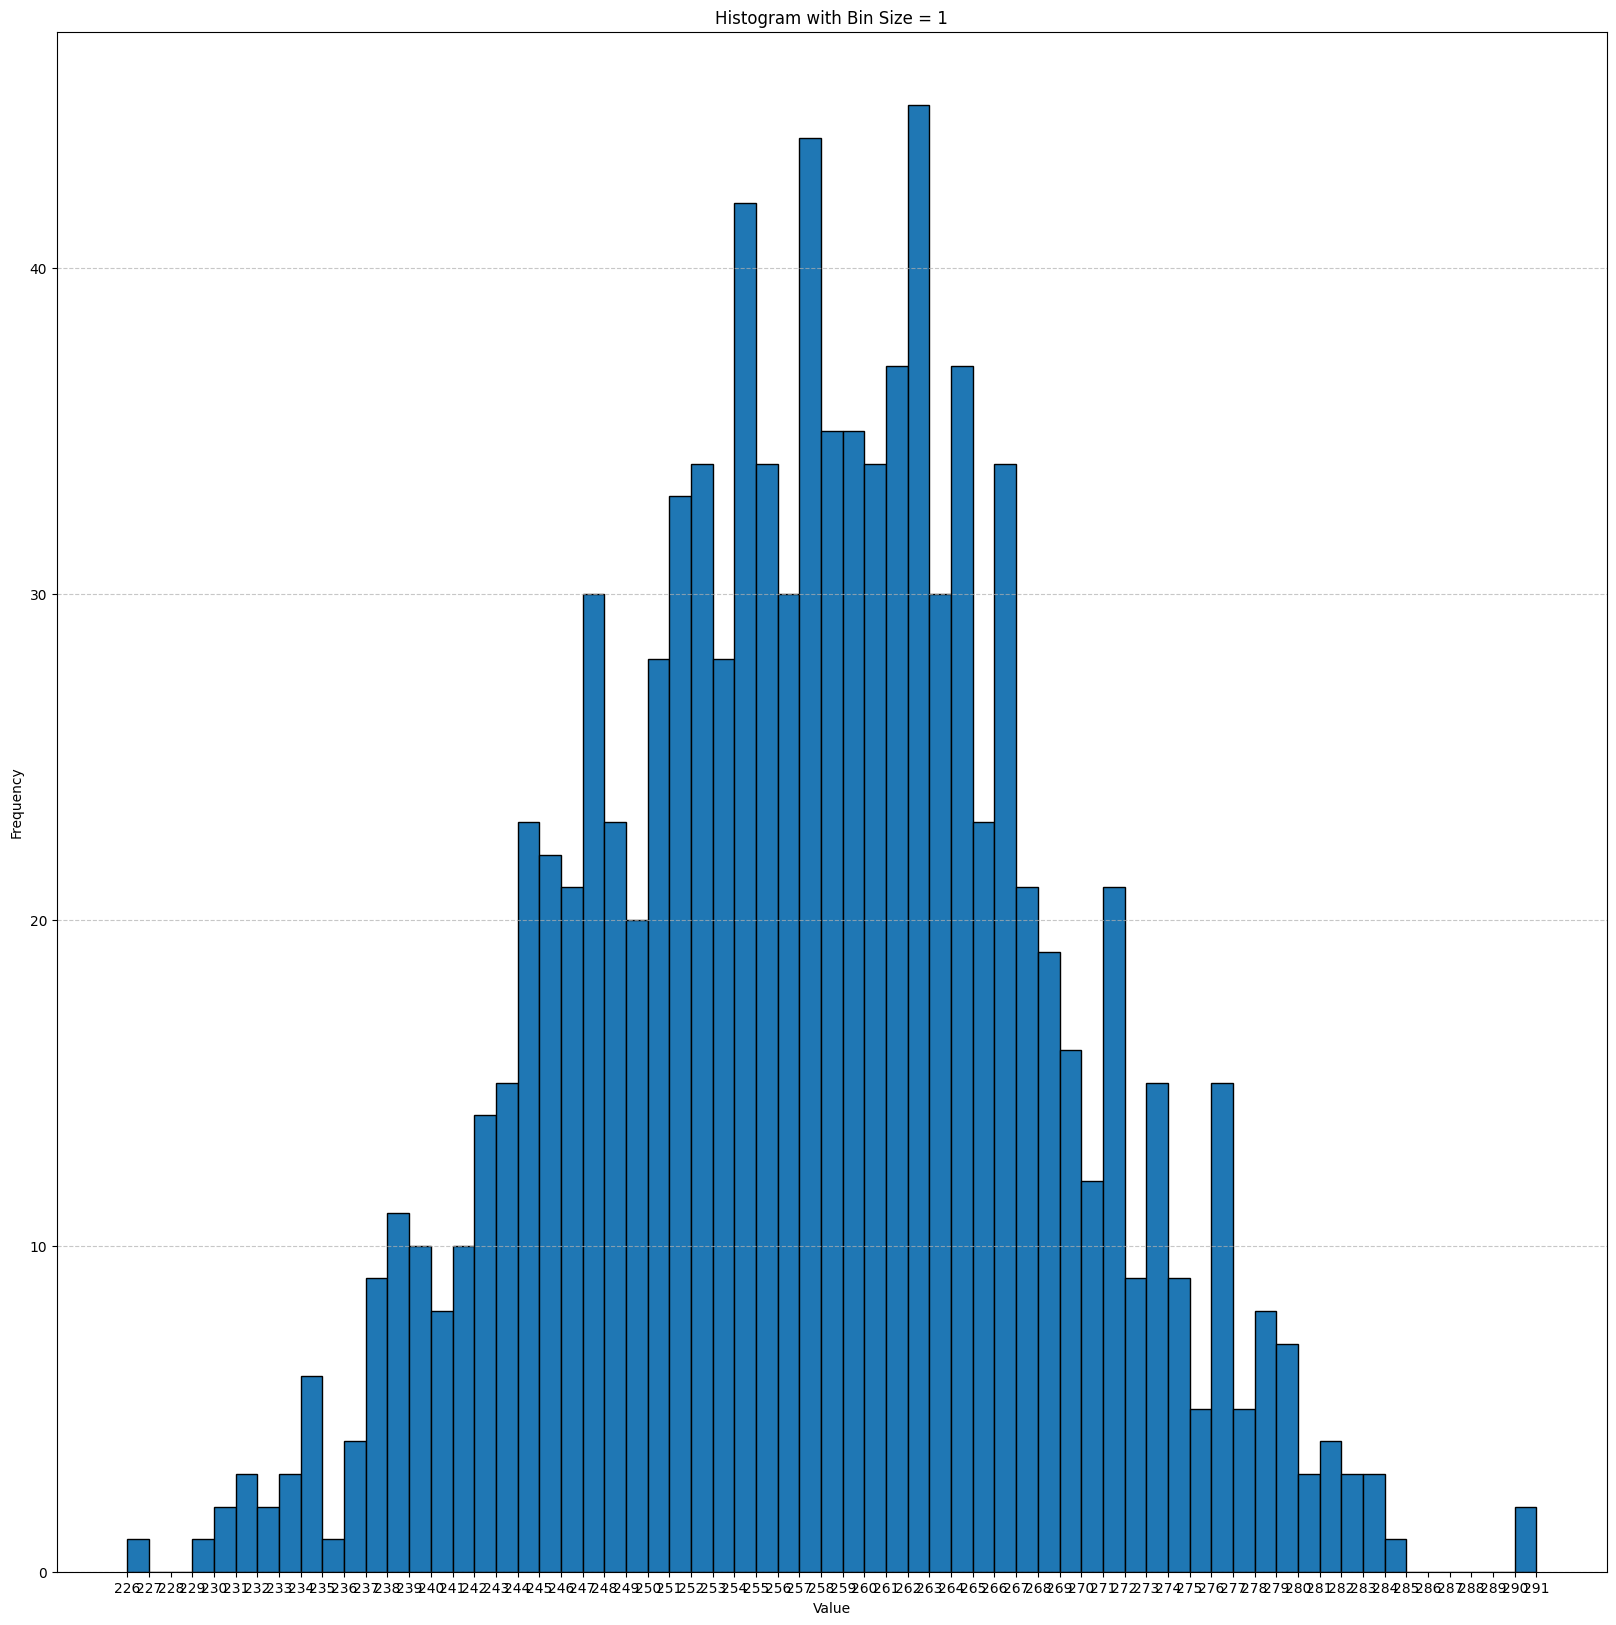

In [12]:
import matplotlib.pyplot as plt

# Sample data
data = intersecting_genes_length_list

# Define bins with size = 1
min_bin = min(data)
max_bin = max(data)
bins = range(min_bin, max_bin + 2)  # +2 to include the last value properly

# Plot
plt.figure(figsize=(20, 20))
plt.hist(data, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size = 1')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Always show details
import scipy.stats as stats

# Updated list of observations
observations = intersecting_genes_length_list
# print(observations)
# [7, 7, 4, 7, 10, 2, 7, 10, 5, 10, 1, 0, 5, 4, 6, 7, 6, 9, 5, 1, 8, 7, 2, 10, 7, 9, 3, 11, 9, 0, 9, 5, 5, 2, 0, 12, 3, 6, 4, 2, 9, 5, 3, 2, 8, 2, 0, 6, 6, 1, 12, 3, 1, 3, 8, 12, 8, 0, 6, 4, 0, 7, 2, 7, 10, 2, 7, 3, 3, 1, 13, 8, 11, 8, 1, 6, 3, 0, 6, 5, 7, 2, 2, 7, 0, 11, 7, 9, 10, 8, 2, 4, 8, 7, 0, 3, 5, 0, 4, 8, 6, 4, 8, 1, 3, 5, 6, 6, 6, 0, 4, 6, 4, 2, 4, 4, 5, 10, 10, 0, 5, 3, 1, 7, 5, 2, 0, 0, 3, 0, 7, 8, 10, 6, 3, 4, 2, 8, 8, 0, 7, 5, 0, 7, 6, 5, 1, 0, 9, 7, 1, 13, 2, 10, 3, 9, 9, 5, 1, 5, 6, 7, 1, 2, 10, 8, 7, 1, 7, 6, 9, 5, 0, 11, 0, 0, 6, 2, 1, 1, 1, 6, 4, 9, 8, 4, 5, 9, 4, 15, 9, 0, 2, 0, 1, 3, 10, 3, 9, 3, 4, 2, 1, 7, 4, 1, 1, 5, 3, 4, 14, 0, 0, 5, 5, 8, 7, 0]

# Calculate the proportion of values greater than or equal to 10
value_of_interest = final_gene_number
print(value_of_interest)
count_extreme = sum(x >= value_of_interest for x in observations)
p_value = count_extreme / len(observations)

p_value

275


0.056

In [15]:
output = "Count"
for count in intersecting_genes_length_list:
    output += f"\n{count}"
with open(f"/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/1.Density_plots_5/napi_density_plot_x_{final_gene_number}_p_{p_value}.csv", 'w') as out_file:
    out_file.write(output)

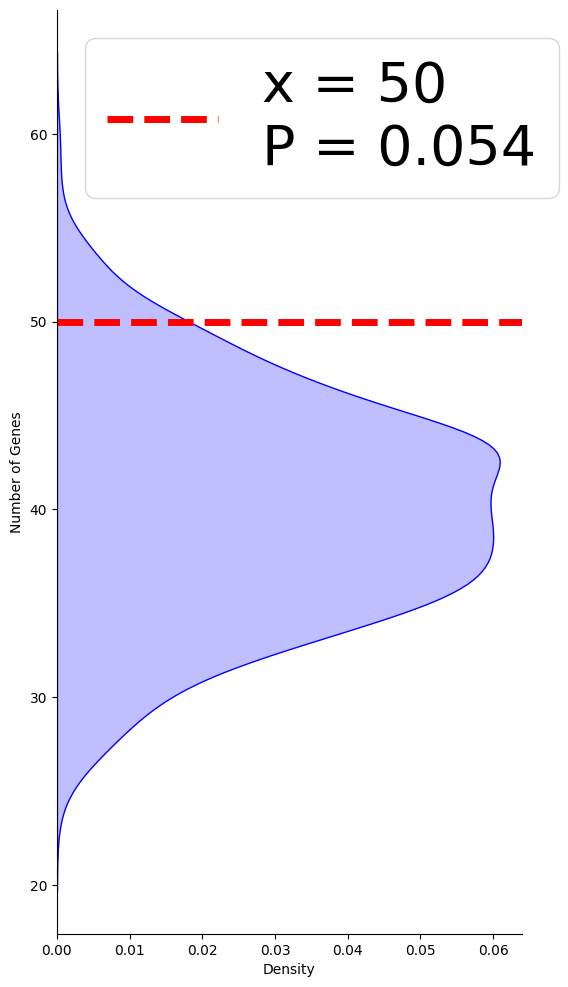

In [57]:
import seaborn as sns
plt.figure(figsize=(6, 12))
sns.kdeplot(y=data, fill=True, linewidth=1, color="blue")

# Vertical line at defined place (example: x=10)
defined_value = value_of_interest
plt.axhline(defined_value, color='red', linestyle='--', linewidth=5, label=f"x = {defined_value}\nP = {p_value}")
sns.despine(top=True, right=True)
plt.ylabel("Number of Genes")
plt.xlabel("Density")
# plt.title("Smooth Density Plot with Vertical Line")
plt.legend(fontsize=40)
# plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.savefig("/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/7.Manhatten/2.Density_plot_1%/napi_density_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()